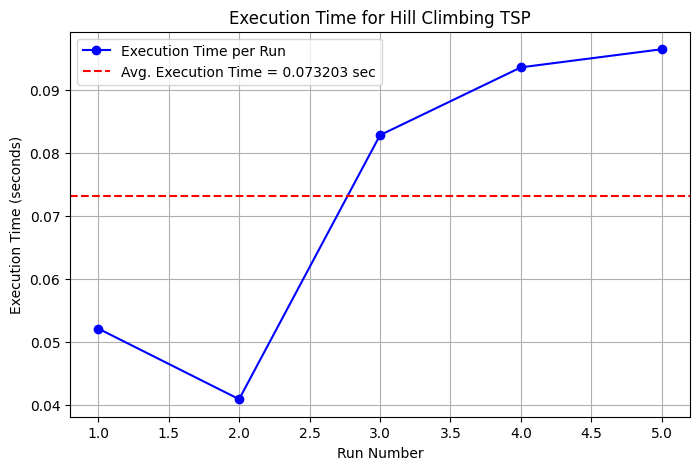

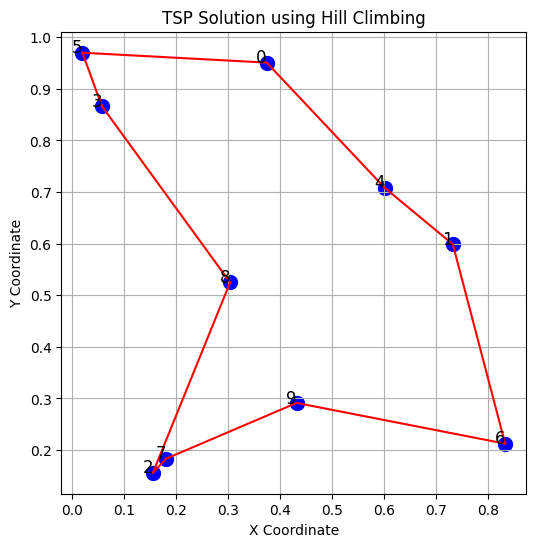

Best route found: [1, 6, 9, 7, 2, 8, 3, 5, 0, 4]
Total distance of best route: 2.9031
Average execution time over 5 runs: 0.073203 seconds


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

# Define the number of cities
num_cities = 10
np.random.seed(42)  # For reproducibility

# Generate random city coordinates
cities = np.random.rand(num_cities, 2)

def euclidean_distance(a, b):
    """Calculate Euclidean distance between two cities"""
    return np.linalg.norm(a - b)

def total_distance(route):
    """Calculate total tour distance"""
    return sum(euclidean_distance(cities[route[i]], cities[route[i+1]]) for i in range(len(route)-1)) + euclidean_distance(cities[route[-1]], cities[route[0]])

def hill_climb_tsp(max_iterations=1000):
    """Solve TSP using Hill Climbing and record execution time"""

    # Initial random route
    current_route = list(range(num_cities))
    random.shuffle(current_route)
    current_distance = total_distance(current_route)

    start_time = time.time()

    for _ in range(max_iterations):
        # Generate a neighboring solution by swapping two cities
        new_route = current_route[:]
        i, j = random.sample(range(num_cities), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]

        new_distance = total_distance(new_route)

        # Accept the new route if it's better
        if new_distance < current_distance:
            current_route, current_distance = new_route, new_distance

    end_time = time.time()
    total_time = end_time - start_time

    return current_route, current_distance, total_time

# Run multiple tests and record execution times
num_runs = 5
execution_times = []
best_route = None
best_distance = float('inf')

for run in range(num_runs):
    route, distance, total_time = hill_climb_tsp()
    execution_times.append(total_time)

    if distance < best_distance:
        best_route = route
        best_distance = distance

# Compute the average execution time over all runs
avg_execution_time = np.mean(execution_times)

# Plot execution time for each run
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_runs + 1), execution_times, marker="o", linestyle="-", color='blue', label="Execution Time per Run")
plt.axhline(avg_execution_time, color="r", linestyle="--", label=f"Avg. Execution Time = {avg_execution_time:.6f} sec")

plt.xlabel("Run Number")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time for Hill Climbing TSP")
plt.legend()
plt.grid()
plt.show()

# Plot the best TSP route
def plot_route(route, cities):
    plt.figure(figsize=(6,6))
    for i in range(num_cities):
        plt.scatter(cities[i][0], cities[i][1], color='blue', s=100)
        plt.text(cities[i][0], cities[i][1], str(i), fontsize=12, ha='right')

    for i in range(num_cities):
        start, end = cities[route[i]], cities[route[(i+1) % num_cities]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'r-')

    plt.title("TSP Solution using Hill Climbing")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid()
    plt.show()

# Plot the best route
plot_route(best_route, cities)

# Print results
print("Best route found:", best_route)
print("Total distance of best route:", round(best_distance, 4))
print(f"Average execution time over {num_runs} runs: {avg_execution_time:.6f} seconds")
